Saving suv dataset.csv to suv dataset.csv
Dataset Head:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset Shape: (400, 5)

Missing Values:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Accuracy: 0.9375

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



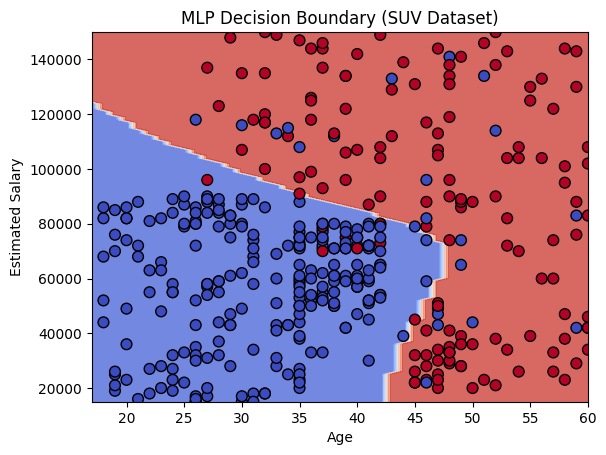

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
uploaded=files.upload()

# Load the dataset
df = pd.read_csv("suv dataset.csv")

# Show first 5 rows
print("Dataset Head:")
print(df.head())

# Dataset shape
print("\nDataset Shape:", df.shape)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Select features (Age, EstimatedSalary) and target (Purchased)
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP Classifier with backpropagation
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu',
                    solver='adam', max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot decision boundary
age = df['Age']
salary = df['EstimatedSalary']

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1000))

Z = mlp.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=60, cmap=plt.cm.coolwarm)
plt.title("MLP Decision Boundary (SUV Dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()